# Import Libraries

In [114]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
from pyngrok import ngrok
import mlflow
import mlflow.sklearn
import os
import h2o
from h2o.automl import H2OAutoML


# Set the experiment name for MLflow
mlflow.set_experiment('diabetes_classification_model')

<Experiment: artifact_location='file:///content/mlruns/617158520734800970', creation_time=1722060309768, experiment_id='617158520734800970', last_update_time=1722060309768, lifecycle_stage='active', name='diabetes_classification_model', tags={}>

# Load Dataset

In [115]:
# Load the dataset
data = pd.read_csv('diabetes_dataset.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


# EDA

In [116]:
# Convert the 'year' column to datetime format
data['year'] = pd.to_datetime(data['year'])
data['year'] = data['year'].dt.strftime('%Y')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  object 
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [117]:
data['age'].value_counts()

age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

In [118]:
# Data validation: Remove rows with invalid age values
# The minimum age value in the dataset is 0.08, which is not valid.
# Therefore, rows where the age is less than or equal to 1 are removed.

data = data[data['age'] > 1]
data.shape

(99006, 16)

In [119]:
# Remove duplicates entries if any
duplicates = data.duplicated()
print(data[duplicates])

data.drop_duplicates(inplace=True)
data.shape

       year  gender   age        location  race:AfricanAmerican  race:Asian  \
2848   1970    Male  40.0          Alaska                     0           0   
21662  1970    Male  65.0         Georgia                     0           1   
23313  1970  Female  21.0            Guam                     0           1   
26317  1970    Male  80.0           Idaho                     0           1   
33506  1970    Male  13.0            Iowa                     0           1   
38483  1970  Female  80.0       Louisiana                     0           0   
43401  1970    Male  46.0        Maryland                     0           1   
47208  1970  Female  21.0        Michigan                     0           0   
48472  1970  Female  29.0       Minnesota                     1           0   
57881  1970  Female  62.0        Nebraska                     1           0   
59507  1970    Male  14.0          Nevada                     0           1   
61867  1970  Female  11.0   New Hampshire           

(98986, 16)

In [120]:
# Check for missing values
print(data.isnull().sum())

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


In [121]:
data['year'].unique()

array(['1970'], dtype=object)

In [122]:
data.drop(['year'], axis=1, inplace=True)

In [123]:
# Encode categorical features using LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['location'] = le.fit_transform(data['location'])

# Scaled according to the intensity of smoking addiction.
# -1 for No info as it doesn't give any information so needs to be treated separately.

data['smoking_history'] = data['smoking_history'].map({'never': 0.0, 'not current': 0.4, 'former':0.6, 'current': 0.8, 'ever' :1, 'No Info': -1})

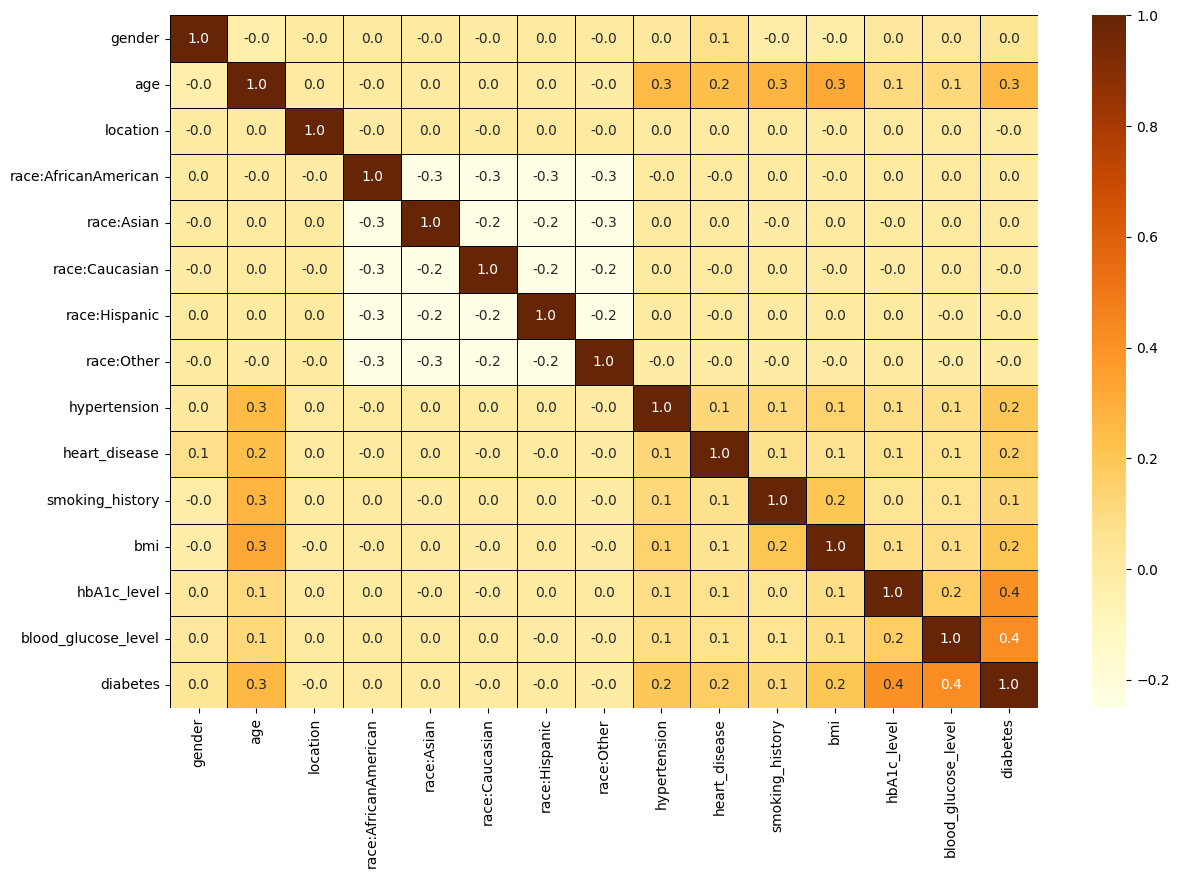

In [124]:
# Display correlation heatmap

plt.figure(figsize=(14,9))
corr=data.corr()
sns.heatmap(corr,annot=True,cmap="YlOrBr",linewidths=0.6,fmt=".1f",linecolor="black")
plt.show()

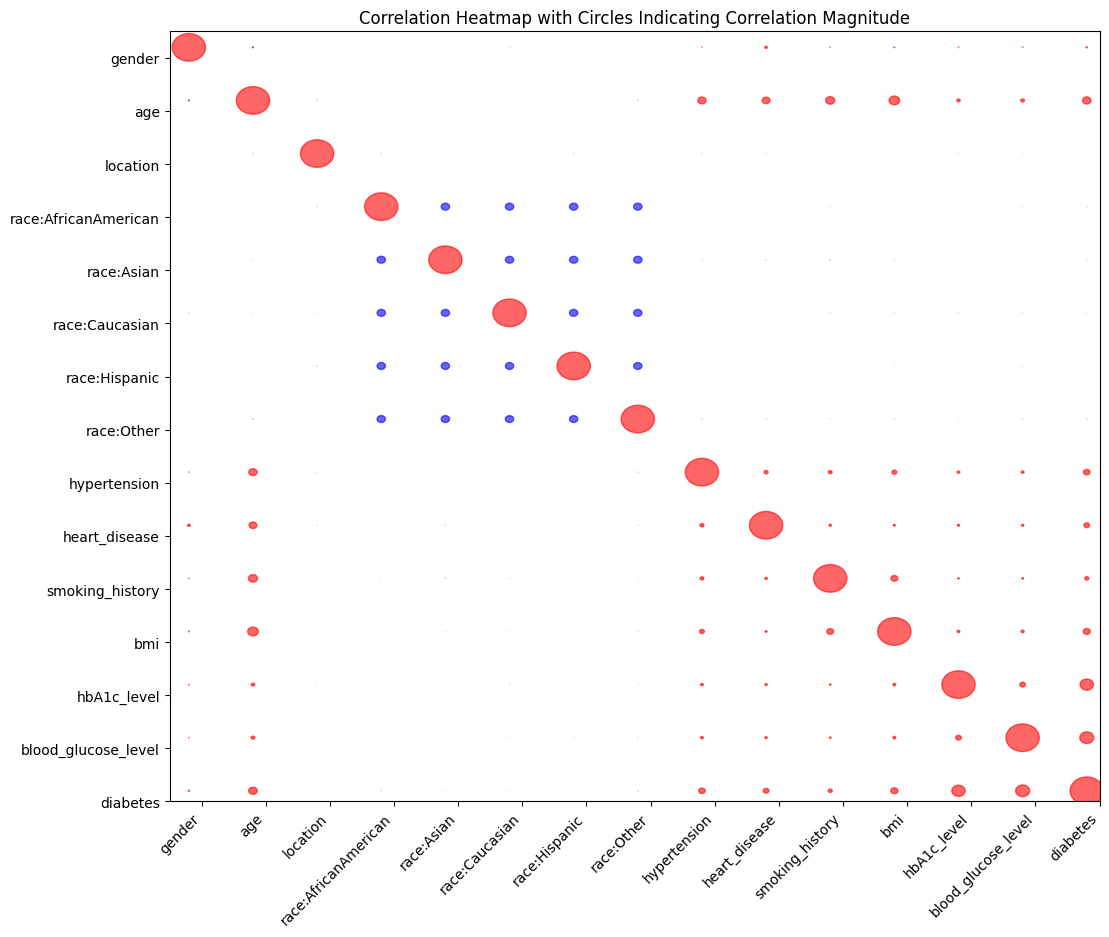

In [125]:
fig, ax = plt.subplots(figsize=(12, 10))

# Visualize correlation using Heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
      corr_value = corr.iloc[i, j]
      if not np.isnan(corr_value):
        radius = np.abs(corr_value) * 0.26  # Adjust the multiplier to control the maximum circle size
        color = 'red' if corr_value > 0 else 'blue'
        circle = plt.Circle((j + 0.3, i + 0.3), radius=radius, color=color, alpha=0.6)
        ax.add_artist(circle)
        # ax.text(j + 0.3, i + 0.3, f'{corr_value:.2f}', ha='center', va='center', color='black')

# Set titles and labels
plt.title('Correlation Heatmap with Circles Indicating Correlation Magnitude')
plt.xticks(np.arange(len(corr.columns)) + 0.5, corr.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(corr.columns)) + 0.5, corr.columns, rotation=0)
plt.gca().invert_yaxis()  # Ensure the heatmap is not upside down
plt.show()

## Summary
1. No missing values
2. Skewed distribution of features
3. Removed 20 duplicates values
4. This heatmap depicts very less correlation between diabetes and location/race.

In [126]:
# Calculate the statistical significance.

import pandas as pd
from scipy.stats import ttest_ind

from IPython.display import HTML, display

# Define function to print colored text
def print_colored(text, color):
    display(HTML(f"<p style='color: {color};'>{text}</p>"))

# Assuming your data is in a DataFrame named 'data' with columns 'hba1c' and 'diabetes'
cols = [i for i in data.columns if i != 'diabetes']
alpha = 0.05

for i in range(len(cols)):
    diab = data[data['diabetes'] == 1][cols[i]]
    no_diab = data[data['diabetes'] == 0][cols[i]]
    t_stat, p_value = ttest_ind(diab, no_diab)
    print(f"T-statistic for {cols[i]}: {t_stat}")
    print(f"P-value for {cols[i]}: {p_value}")

    if p_value < alpha:
        print_colored(f"The difference in {cols[i]} between diabetic and non-diabetic groups is statistically significant.", 'red')
    else:
        print(f"The difference in {cols[i]} between diabetic and non-diabetic groups is not statistically significant.")

    print("-"*50)


T-statistic for gender: 12.049660175306217
P-value for gender: 2.0554101727175077e-33


--------------------------------------------------
T-statistic for age: 83.6448365903088
P-value for age: 0.0


--------------------------------------------------
T-statistic for location: -0.014346941255515137
P-value for location: 0.9885532186853514
The difference in location between diabetic and non-diabetic groups is not statistically significant.
--------------------------------------------------
T-statistic for race:AfricanAmerican: 1.44392832337076
P-value for race:AfricanAmerican: 0.14876230346039346
The difference in race:AfricanAmerican between diabetic and non-diabetic groups is not statistically significant.
--------------------------------------------------
T-statistic for race:Asian: 1.138945122878947
P-value for race:Asian: 0.25472879997953185
The difference in race:Asian between diabetic and non-diabetic groups is not statistically significant.
--------------------------------------------------
T-statistic for race:Caucasian: -0.5861044701960648
P-value for race:Caucasian: 0.5578066488946258
The difference in race:Caucasian between diabetic and non-diabetic groups is not statisti

--------------------------------------------------
T-statistic for heart_disease: 54.67348212472394
P-value for heart_disease: 0.0


--------------------------------------------------
T-statistic for smoking_history: 38.45763602821332
P-value for smoking_history: 0.0


--------------------------------------------------
T-statistic for bmi: 68.4710716204071
P-value for bmi: 0.0


--------------------------------------------------
T-statistic for hbA1c_level: 138.18670913426362
P-value for hbA1c_level: 0.0


--------------------------------------------------
T-statistic for blood_glucose_level: 145.9659170064217
P-value for blood_glucose_level: 0.0


--------------------------------------------------


In [127]:
# remove non-significant columns

data.drop(['location', 'race:AfricanAmerican', 'race:Asian','race:Caucasian', 'race:Hispanic', 'race:Other'], inplace= True, axis=1)

In [128]:
# Group the BMI numbers into 5 categories - underweight, heatlhy, overweight, obese and severly obese
# underweight - <18.5          0
# healthy - 18.5 to 24.9       1
# overweight - 25 to 29.9      2
# obese - 30 to 39.9           3
# severly obese - >40          4

# def func(x):
#     if x < 18.5:
#         return 0
#     elif 18.5 <= x <= 24.9:
#         return 1
#     elif 25 <= x <= 29.9:
#         return 2
#     elif 30 <= x <= 39.9:
#         return 3
#     else:
#         return 4

# data['bmi_category'] = data['bmi'].apply(func)

In [129]:
# check skewness of each column
# lower than -1 or greater than 1 means highly skewed
for i in data.columns:
    print(i)
    print(data[i].skew())
    print()

gender
0.3552968642383481

age
-0.046157861599351174

hypertension
3.2104045306291025

heart_disease
4.706670869066762

smoking_history
-0.051650009635579766

bmi
1.0823532354043253

hbA1c_level
-0.06383563284967293

blood_glucose_level
0.8253582771909281

diabetes
2.95628378571917



<Axes: xlabel='heart_disease', ylabel='count'>

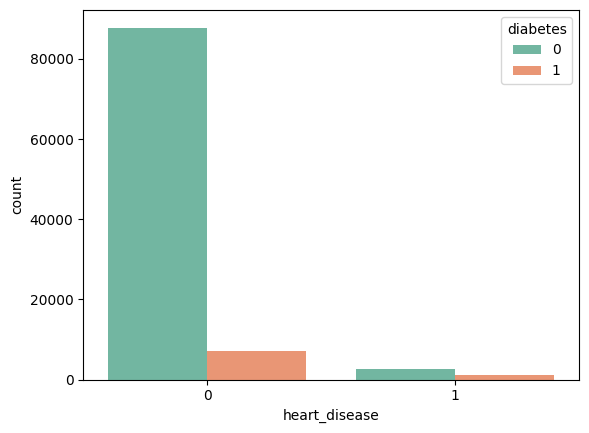

In [130]:
# barplot of heart-disease column
sns.countplot(x='heart_disease', hue='diabetes', data=data, palette='Set2')

<Axes: xlabel='hypertension', ylabel='count'>

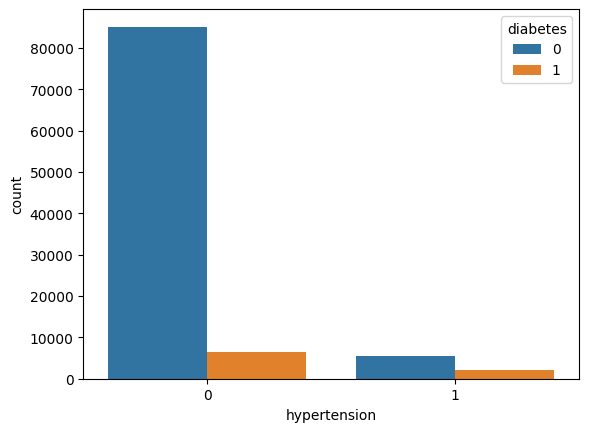

In [131]:
sns.countplot(x='hypertension', hue = 'diabetes',data=data)

<Axes: xlabel='gender', ylabel='count'>

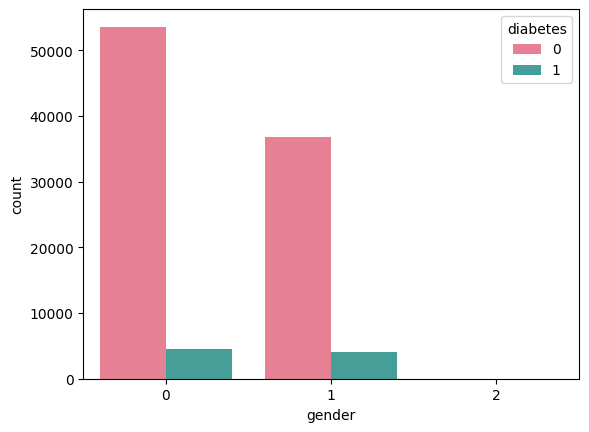

In [132]:
sns.countplot(x='gender', data=data, hue = 'diabetes', palette='husl')

In [133]:
# Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(data)
sweet_report.show_html('diabetes_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report diabetes_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [134]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

# Call AutoViz using the filename (or dataframe) along with the separator and
# the name of the target variable in the input.

filename = "/content/diabetes_dataset.csv"
sep = ','
dft = AV.AutoViz(filename, sep=",", depVar='diabetes')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (100000, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  7
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
year,int64,0.000000,0,2015.000000,2022.000000,Possible date-time colum: transform before modeling step.
gender,object,0.000000,0,,,1 rare categories: ['Other']. Group them into a single category or drop the categories.
age,float64,0.000000,NA,0.080000,80.000000,No issue
location,object,0.000000,0,,,"3 rare categories: ['Virgin Islands', 'Wisconsin', 'Wyoming']. Group them into a single category or drop the categories."
race:AfricanAmerican,int64,0.000000,0,0.000000,1.000000,No issue
race:Asian,int64,0.000000,0,0.000000,1.000000,No issue
race:Caucasian,int64,0.000000,0,0.000000,1.000000,No issue
race:Hispanic,int64,0.000000,0,0.000000,1.000000,No issue
race:Other,int64,0.000000,0,0.000000,1.000000,No issue
hypertension,int64,0.000000,0,0.000000,1.000000,No issue


Total Number of Scatter Plots = 6
Could not draw some Time Series plots. 'NoneType' object has no attribute 'suptitle'
All Plots done
Time to run AutoViz = 44 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


# MODEL

In [135]:
# Perform Stratified sampling for imbalanced data.
# Split the data into features and target variable
X = data.loc[:, data.columns != 'diabetes']
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [136]:
# Build basic Logistic Regresesion ML model to set baseline

with mlflow.start_run():
    base_model = LogisticRegression()
    base_model.fit(X_train, y_train)

    y_pred = base_model.predict(X_test)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("recall", recall_score(y_test, y_pred))
    mlflow.log_metric("F1 score", f1_score(y_test, y_pred))

    mlflow.sklearn.log_model(base_model, "base-model")

print("Accuracy Score Logistic Regression:", accuracy_score(y_test, y_pred))
print("Confusion matrix", confusion_matrix(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))

Accuracy Score Logistic Regression: 0.959051724137931
Confusion matrix [[26897   249]
 [  967  1583]]
Recall 0.6207843137254901


In [137]:
# SVM model

with mlflow.start_run():
    svm_clf = svm.SVC()
    svm_clf.fit(X_train, y_train)

    svm_pred = svm_clf.predict(X_test)

    mlflow.log_metric("accuracy", accuracy_score(y_test, svm_pred))
    mlflow.log_metric("recall", recall_score(y_test,svm_pred))
    mlflow.log_metric("f1_score", f1_score(y_test, svm_pred))

print("Accuracy Score:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:", confusion_matrix(y_test, svm_pred))
print("Recall: ", recall_score(y_test, svm_pred))
print("f1 score: ", f1_score(y_test, svm_pred))

Accuracy Score: 0.9633957435344828
Confusion Matrix: [[27108    38]
 [ 1049  1501]]
Recall:  0.5886274509803922
f1 score:  0.7341648324773783


In [138]:
# XGBclassifier

with mlflow.start_run():
    XGB_model_1 = XGBClassifier()
    XGB_model_1.fit(X_train, y_train)

    xgb_pred = XGB_model_1.predict(X_test)

    mlflow.log_metric("accuracy", accuracy_score(y_test, xgb_pred))
    mlflow.log_metric("recall", recall_score(y_test, xgb_pred))
    mlflow.log_metric("f1_score", f1_score(y_test, xgb_pred))

print("Accuracy Score:", accuracy_score(y_test, xgb_pred))
print("Confusion Matrix", confusion_matrix(y_test, xgb_pred))
print("Recall: ", recall_score(y_test, xgb_pred)) # recall can be improved.
print("f1 score", f1_score(y_test, xgb_pred, average='binary'))

Accuracy Score: 0.9706021012931034
Confusion Matrix [[27058    88]
 [  785  1765]]
Recall:  0.692156862745098
f1 score 0.801726095843743


In [139]:
# Ensemble technique
# Initialize models
lr_1 = LogisticRegression()
rf_2 = RandomForestClassifier()
grad_3 = GradientBoostingClassifier()
knn_4 = KNeighborsClassifier()

# Create a VotingClassifier using the base models
final_model = VotingClassifier(
    estimators=[('lr', lr_1), ('rf', rf_2), ('grad', grad_3), ('knn', knn_4)], voting='hard')

# Train the VotingClassifier on the training dataset and log metrics
with mlflow.start_run():
    # Fit the model
    final_model.fit(X_train, y_train)

    # Make predictions on the test dataset
    pred_final = final_model.predict(X_test)

    # Log performance metrics with MLflow
    mlflow.log_metric("accuracy", accuracy_score(y_test, pred_final))
    mlflow.log_metric("recall", recall_score(y_test, pred_final))
    mlflow.log_metric("f1_score", f1_score(y_test, pred_final))

# Print performance metrics
print("Accuracy Score:", accuracy_score(y_test, pred_final))
print("Confusion Matrix", confusion_matrix(y_test, pred_final))
print("Recall:", recall_score(y_test, pred_final))
print("F1 score:", f1_score(y_test, pred_final))


Accuracy Score: 0.9669989224137931
Confusion Matrix [[27113    33]
 [  947  1603]]
Recall: 0.6286274509803922
F1 score: 0.7658862876254182


In [ ]:
# Compare results in MLFLOW dashboard
# Signup here https://ngrok.com/
# Go to your profile and copy the AUTH-TOKEN

ngrok.kill()
ngrok_token = 'YOUR NGROK AUTH-TOKEN'
ngrok.set_auth_token(ngrok_token)
ngrok_tunnel = ngrok.connect(5000)
print(ngrok_tunnel)

In [ ]:
!mlflow ui

In [ ]:
h2o.init()

# Load data
data = h2o.import_file('diabetes_dataset.csv')
train, test = data.split_frame(ratios=[.8], seed=1234)

# Set the predictor and response columns
x = train.columns
y = 'diabetes'
x.remove(y)

# Run AutoML for 20 base models (limited for demo purposes)
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

# Predict on test set
preds = aml.predict(test)

# Conclusion

XGBoost, Ensemble techniques and Auto-ML tools have similar performance.